In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Loading California Housing Data

In [5]:
file_path = "sample_data/housing.csv"

In [6]:
data = pd.read_csv(file_path)

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
data.head(10)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
missing_values = data.isnull().sum()

missing_percentage = (missing_values / len(data)) * 100

print("Missing values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
data_cleaned = data.dropna()

print("\nMissing value in each column after removel:")
print(data_cleaned.isnull().sum())


Missing value in each column after removel:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Data Exploration and Visualization

In [10]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

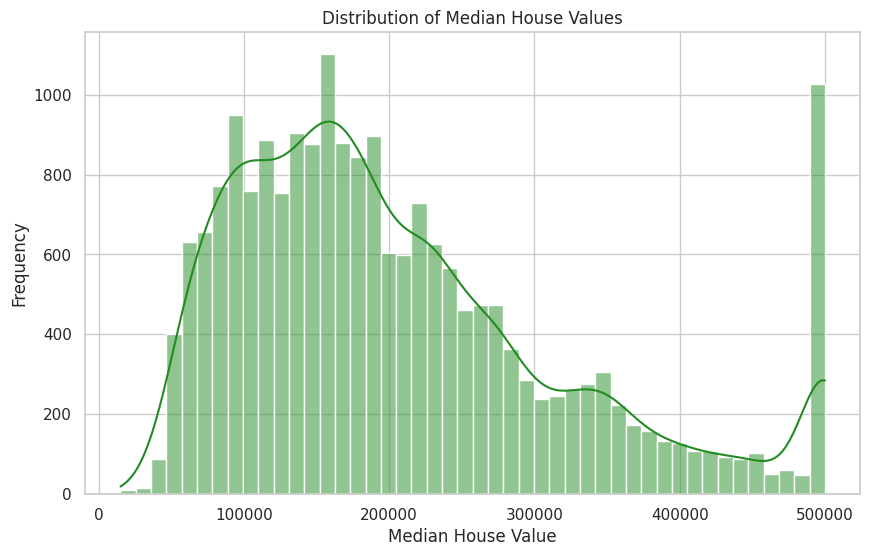

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### Using InterQualtile Range to Remove Outliers

In [12]:
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]


print("Orignal data shape:", data_cleaned.shape )
print("New data shape without outliers:", data_no_outliers_1.shape)


Orignal data shape: (20433, 10)
New data shape without outliers: (19369, 10)


### BoxPlot for Outlier Setection

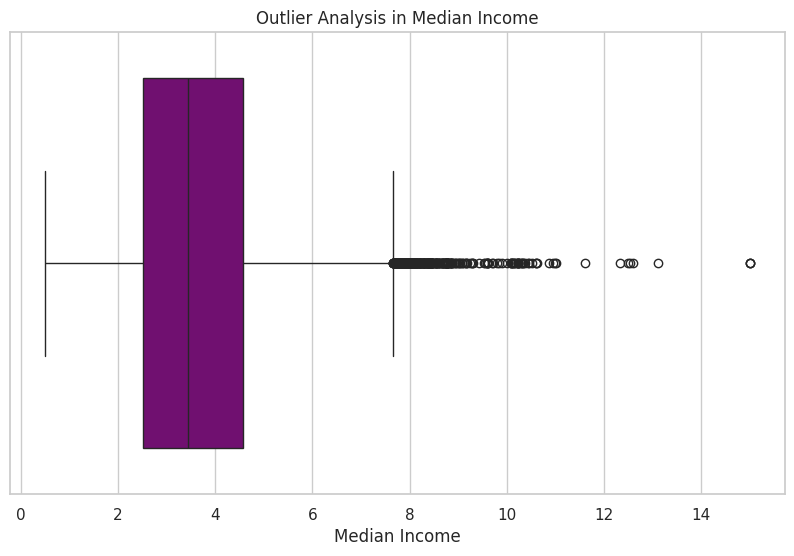

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [14]:
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]


print("Orignal data shape:", data_no_outliers_1.shape )
print("New data shape without outliers:", data_no_outliers_2.shape)


Orignal data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [15]:
data = data_no_outliers_2
numeric_data = data.select_dtypes(include='number')
numeric_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
5           413.0       193.0         4.0368            269700.0  
6          1094.0       514.0         3.6591            299200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[19026 rows x 9 columns]

### Correlation HeatMap

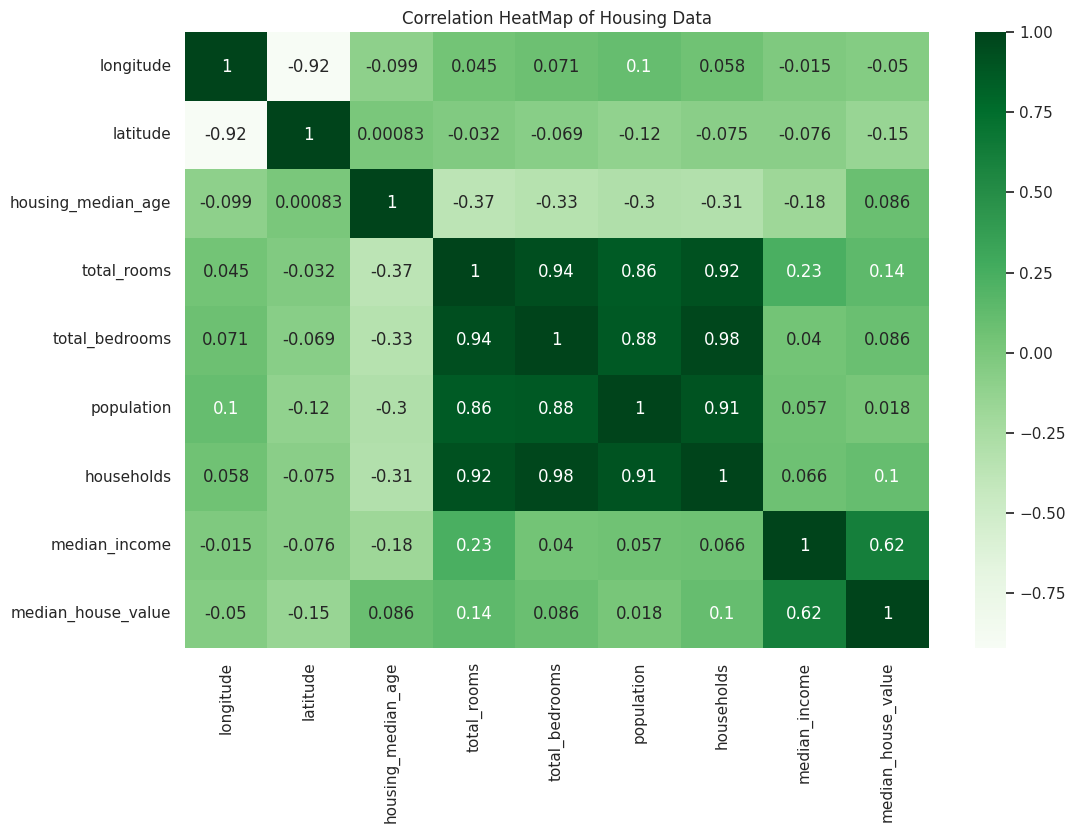

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation HeatMap of Housing Data')
plt.show()

In [17]:
data = data.drop('total_bedrooms', axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [18]:
 for column in ['ocean_proximity']:
     print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### String Data Categorization to Dummy Variables

In [19]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
2                          False                   False   
3                          False                   False   
4                          False                   False   
5                          False                   False   
6                          False                   False   
...                          ...                     ...   
20635                      False                    True   
20636                      False                    True   
20637                      False                    True   
20638                      False                    True   
20639                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                       False                      True   
3                       False                      True   
4                       False                      True   
5                       False                      True   
6                       False                      True   
...                       ...                       ...   
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  
2                           False  
3                           False  
4                           False  
5                           False  
6                           False  
...                           ...  
20635                       False  
20636                       False  
20637                       False  
20638                       False  
20639                       False  

[19026 rows x 5 columns]

In [20]:
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
data = data.drop('ocean_proximity_ISLAND', axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
data.head(10)

longitude  latitude  housing_median_age  total_rooms  population  \
2     -122.24     37.85                52.0       1467.0       496.0   
3     -122.25     37.85                52.0       1274.0       558.0   
4     -122.25     37.85                52.0       1627.0       565.0   
5     -122.25     37.85                52.0        919.0       413.0   
6     -122.25     37.84                52.0       2535.0      1094.0   
7     -122.25     37.84                52.0       3104.0      1157.0   
8     -122.26     37.84                42.0       2555.0      1206.0   
9     -122.25     37.84                52.0       3549.0      1551.0   
10    -122.26     37.85                52.0       2202.0       910.0   
11    -122.26     37.85                52.0       3503.0      1504.0   

    households  median_income  median_house_value  ocean_proximity_<1H OCEAN  \
2        177.0         7.2574            352100.0                      False   
3        219.0         5.6431            341300.0                      False   
4        259.0         3.8462            342200.0                      False   
5        193.0         4.0368            269700.0                      False   
6        514.0         3.6591            299200.0                      False   
7        647.0         3.1200            241400.0                      False   
8        595.0         2.0804            226700.0                      False   
9        714.0         3.6912            261100.0                      False   
10       402.0         3.2031            281500.0                      False   
11       734.0         3.2705            241800.0                      False   

    ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
2                    False                      True   
3                    False                      True   
4                    False                      True   
5                    False                      True   
6                    False                      True   
7                    False                      True   
8                    False                      True   
9                    False                      True   
10                   False                      True   
11                   False                      True   

    ocean_proximity_NEAR OCEAN  
2                        False  
3                        False  
4                        False  
5                        False  
6                        False  
7                        False  
8                        False  
9                        False  
10                       False  
11                       False

### Splitting the Data into Train/Test

In [23]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

target = ["median_house_value"]

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


### Training

In [36]:
X_train_const = sm.add_constant(X_train)
X_train_const = X_train_const.astype({col: int for col in X_train_const.select_dtypes(bool).columns})

# Ensure y_train is float
y_train = y_train.astype(float)
X_train_const

const  longitude  latitude  housing_median_age  total_rooms  \
15578    1.0    -116.90     33.03                11.0       3213.0   
1656     1.0    -121.93     37.89                13.0       2085.0   
9190     1.0    -118.35     34.32                52.0        102.0   
11839    1.0    -120.95     39.93                26.0       2023.0   
12267    1.0    -116.91     33.75                13.0      10886.0   
...      ...        ...       ...                 ...          ...   
15355    1.0    -117.32     33.25                 7.0       8206.0   
9608     1.0    -120.51     37.29                20.0       4927.0   
12606    1.0    -121.49     38.50                32.0       2364.0   
2907     1.0    -119.03     35.37                52.0       1503.0   
18139    1.0    -122.01     37.34                31.0       3080.0   

       population  households  median_income  median_house_value  \
15578      1975.0       579.0         3.4750            167200.0   
1656        852.0       264.0         7.3445            366700.0   
9190         54.0        32.0         1.9875            191700.0   
11839       922.0       365.0         2.8125             83500.0   
12267      4266.0      1955.0         2.3169            123400.0   
...           ...         ...            ...                 ...   
15355      4399.0      1423.0         3.6301            170900.0   
9608       4205.0      1009.0         1.7679             79800.0   
12606      1331.0       449.0         3.3190             84500.0   
2907        554.0       277.0         1.6786            126600.0   
18139      1493.0       582.0         6.3052            344200.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
15578                          1                       0   
1656                           0                       1   
9190                           1                       0   
11839                          0                       1   
12267                          0                       1   
...                          ...                     ...   
15355                          1                       0   
9608                           0                       1   
12606                          0                       1   
2907                           0                       1   
18139                          1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
15578                         0                           0  
1656                          0                           0  
9190                          0                           0  
11839                         0                           0  
12267                         0                           0  
...                         ...                         ...  
15355                         0                           0  
9608                          0                           0  
12606                         0                           0  
2907                          0                           0  
18139                         0                           0  

[15220 rows x 13 columns]

In [38]:
model_fitted = sm.OLS(y_train, X_train_const).fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.375e+32
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:27:39   Log-Likelihood:             3.2603e+05
No. Observations:               15220   AIC:                        -6.520e+05
Df Residuals:                   15207   BIC:                        -6.519e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Prediction/Testing

In [44]:
X_test_const = sm.add_constant(X_test)

test_predictions= model_fitted.predict(X_test_const)

test_predictions

7322     164400.0
465      196400.0
12768     65200.0
2617      73600.0
13351    195100.0
           ...   
11691    217000.0
1454     229200.0
7360     142000.0
19118    200600.0
13084    129500.0
Length: 3806, dtype: object

### checking OLS Assumtions

Assumtion 1: Linearity

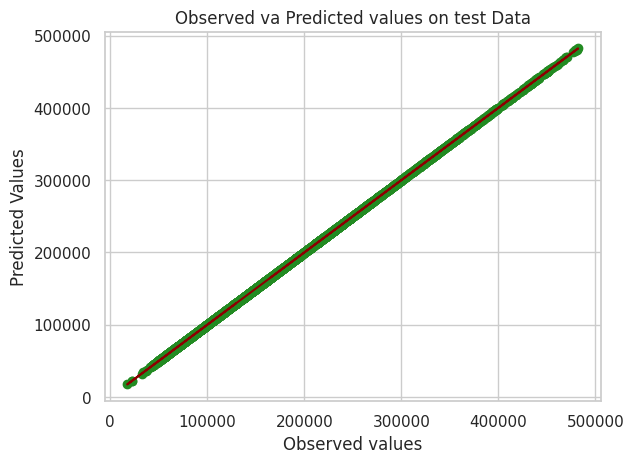

In [47]:
plt.scatter(y_test, test_predictions, color= "forestgreen")
plt.xlabel('Observed values')
plt.ylabel('Predicted Values')
plt.title('Observed va Predicted values on test Data')
plt.plot(y_test, y_test, color='darkred')
plt.show()

### Assumtion 2: Random Sample

In [49]:
mean_residuals = np.mean(model_fitted.resid)

print(f"the mean of the residuals is {np.round(mean_residuals, 2)}")

the mean of the residuals is -0.0


### Plotting the residuals

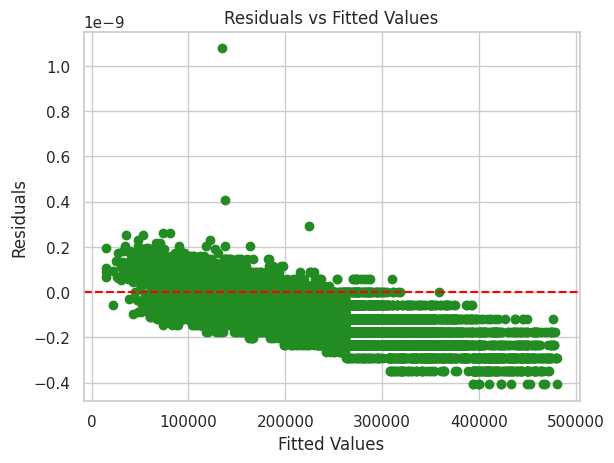

In [52]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Assumtion 3: Exogeneity

In [53]:
residuals = model_fitted.resid

for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column }: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.03
Correlation between residuals and latitude: 0.29
Correlation between residuals and housing_median_age: -0.23
Correlation between residuals and total_rooms: 0.05
Correlation between residuals and population: 0.15
Correlation between residuals and households: 0.04
Correlation between residuals and median_income: -0.36
Correlation between residuals and median_house_value: -0.81
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.41
Correlation between residuals and ocean_proximity_INLAND: 0.7
Correlation between residuals and ocean_proximity_NEAR BAY: 0.06
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.45


### Assumtion 4: Homoskedasticty

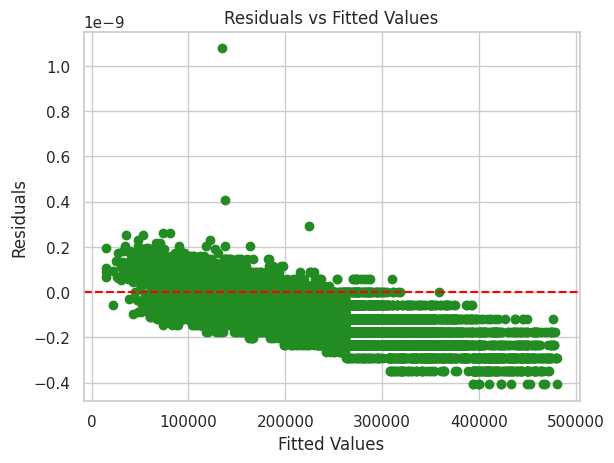

In [54]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

 ### Train/Test/Evaluation with Sklearn

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fir the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 8.012498642250705e-11


In [62]:
print(y_pred)
y_test

[[164400.]
 [196400.]
 [ 65200.]
 ...
 [142000.]
 [200600.]
 [129500.]]


median_house_value
7322             164400.0
465              196400.0
12768             65200.0
2617              73600.0
13351            195100.0
...                   ...
11691            217000.0
1454             229200.0
7360             142000.0
19118            200600.0
13084            129500.0

[3806 rows x 1 columns]